In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
! cd COVID-19 && git pull

remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 133 (delta 84), reused 87 (delta 84), pack-reused 45
Receiving objects: 100% (133/133), 2.94 MiB | 4.64 MiB/s, done.
Resolving deltas: 100% (93/93), completed with 19 local objects.
From https://github.com/pcm-dpc/COVID-19
   a2dca61..9027470  master     -> origin/master
Updating a2dca61..9027470
Fast-forward
 .github/ISSUE_TEMPLATE/error.md                    |    2 +-
 CHANGELOG.md                                       |    7 +
 CHANGELOG_EN.md                                    |    6 +
 README.md                                          |   86 +-
 ...pc-covid19-ita-andamento-nazionale-20200316.csv |    2 +
 ...pc-covid19-ita-andamento-nazionale-20200317.csv |    2 +
 ...pc-covid19-ita-andamento-nazionale-20200318.csv |    2 +
 ...pc-covid19-ita-andamento-nazionale-20200319.csv |    2 +
 .../dpc-covid19-ita-andamento-nazionale-latest.csv |

In [4]:
import os
import pandas as pd

In [5]:
original_df = pd.read_csv(os.path.join("COVID-19", "dati-province", "dpc-covid19-ita-province.csv"))

In [6]:
original_df['data'] = pd.to_datetime(original_df['data'])
df = original_df[['data', 'codice_provincia', 'totale_casi', 'sigla_provincia']]
df = df.dropna()
df = df.loc[df['sigla_provincia'].isin(['BA', 'LE', 'TA', 'BT', 'FG'])]

In [7]:
df = df.pivot(index="data", columns="sigla_provincia", values="totale_casi")

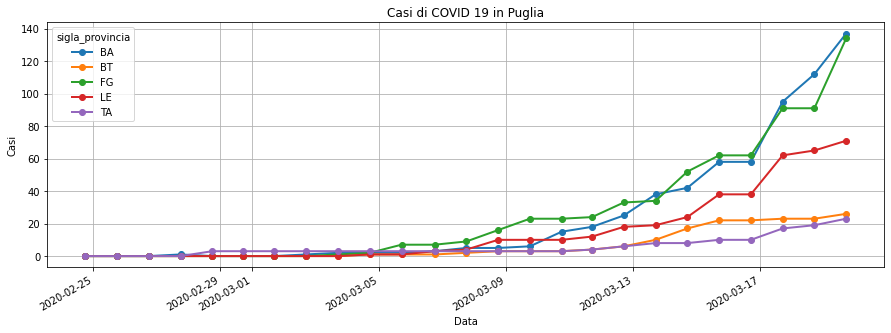

In [8]:
plot = df.plot(linewidth=2.0, marker='o', grid=True, title="Casi di COVID 19 in Puglia")
plot.set_xlabel("Data")
plot.set_ylabel("Casi")
fig = plot.get_figure()
fig.savefig("covid-cases-puglia.png")

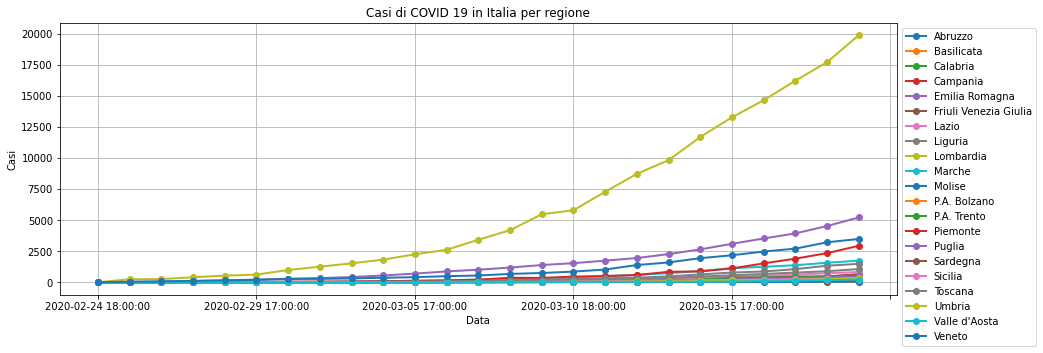

In [9]:
original_df = pd.read_csv(os.path.join("COVID-19", "dati-province", "dpc-covid19-ita-province.csv"))
df = original_df[['data', 'denominazione_regione', 'totale_casi']]
df = df.groupby(['data', 'denominazione_regione']).sum().reset_index()
df = df.pivot(index="data", columns="denominazione_regione", values="totale_casi")
plot = df.plot(linewidth=2.0, marker='o', grid=True, title="Casi di COVID 19 in Italia per regione")
plot.set_xlabel("Data")
plot.set_ylabel("Casi")
plot.legend(bbox_to_anchor=(1, 1))

fig = plot.get_figure()
fig.savefig("covid-cases-italia.png")

In [55]:
import folium 
def generateBaseMap(default_location=[41.89193, 12.51133], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()


In [56]:
from folium.plugins import HeatMap

original_df['data'] = pd.to_datetime(original_df['data'])
df = original_df[['totale_casi', 'lat', 'long', 'data', 'sigla_provincia']]
df = df.dropna()


df = df[df['data'] == '2020-03-01T17:00:00.000000000']
HeatMap(
    name="2020-03-01T17:00:00",
    data=df[['lat', 'long', 'totale_casi']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

df = original_df[['totale_casi', 'lat', 'long', 'data', 'sigla_provincia']]
df = df.dropna()
df = df[df['data'] == '2020-03-19T17:00:00.000000000']

HeatMap(
    name="2020-03-19T17:00:00",
    data=df[['lat', 'long', 'totale_casi']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

folium.LayerControl(collapsed=False).add_to(base_map)
base_map


In [14]:
an = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
an['tamponi/totale_attualmente_positivi'] = an['tamponi']/an['totale_attualmente_positivi']
an['ricoverati_con_sintomi/terapia_intensiva'] = an['terapia_intensiva']/an['ricoverati_con_sintomi'] * 100

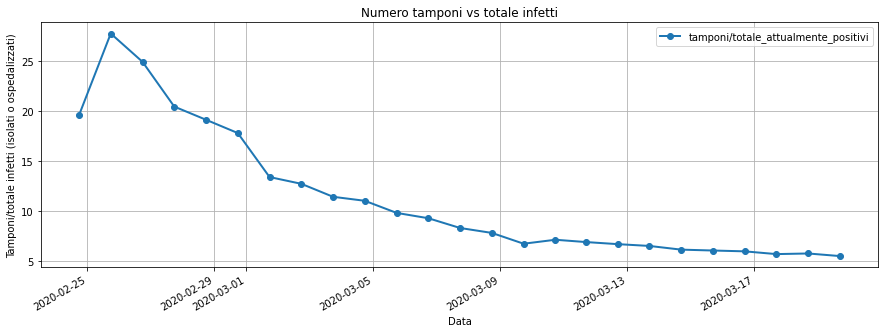

In [15]:
an['data'] = pd.to_datetime(an['data'])
an = an[['data', 'tamponi/totale_attualmente_positivi']]
an.set_index('data', inplace=True)

plot = an.plot(linewidth=2.0, marker='o', grid=True, title="Numero tamponi vs totale infetti")
plot.set_xlabel("Data")
plot.set_ylabel("Tamponi/totale infetti (isolati o ospedalizzati)")
plot.legend(bbox_to_anchor=(1, 1))

fig = plot.get_figure()
fig.savefig("testsVsInfected-italia.png")

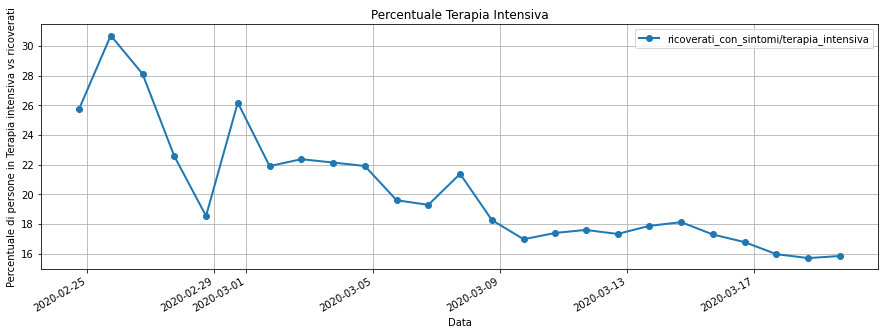

In [16]:
an = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
an['tamponi/totale_attualmente_positivi'] = an['tamponi']/an['totale_attualmente_positivi']
an['ricoverati_con_sintomi/terapia_intensiva'] = an['terapia_intensiva']/an['ricoverati_con_sintomi'] * 100
an['data'] = pd.to_datetime(an['data'])
an = an[['data', 'ricoverati_con_sintomi/terapia_intensiva']]
an.set_index('data', inplace=True)

plot = an.plot(linewidth=2.0, marker='o', grid=True, title="Percentuale Terapia Intensiva")
plot.set_xlabel("Data")
plot.set_ylabel("Percentuale di persone in Terapia intensiva vs ricoverati")
plot.legend(bbox_to_anchor=(1, 1))

fig = plot.get_figure()
fig.savefig("TI_hospitalized-italia.png")